# Oil Production Tonnes

Projeto final da disciplina **Forecasting**

**Aluna:** Fernanda de Queiroz Souza

*Fonte: https://github.com/Eraylson/series_temporais*

## Bibliotecas

In [1]:
#!pip install pmdarima

In [1]:
import pmdarima as pm
from pmdarima import auto_arima

In [2]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import os

import datetime
from datetime import datetime, date, time, timedelta

import statsmodels.api as sm
import statsmodels.tsa.api as tsa
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss

import sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

In [3]:
import  warnings 
warnings.simplefilter('ignore')

In [4]:
# Configurando tamanho das imagens
rcParams['figure.figsize'] = 15, 6

## Leitura dos dados

In [5]:
original_path = os.getcwd()
original_path

'C:\\Users\\Fernanda.Souza\\OneDrive - Unilever\\Documents\\Jupyter\\MBA\\MBA_Forecasting'

In [6]:
os.chdir('C:/Users/Fernanda.Souza/OneDrive - Unilever/Documents/Jupyter/MBA/MBA_Forecasting/ProjetoFinal')

In [7]:
df = pd.read_excel('oil-production-tonnes.xls')

## Análise dos dados

In [8]:
df

,Year,Million Tones
0,1965-01-01,5.033297
1,1966-01-01,6.147396
2,1967-01-01,7.738966
3,1968-01-01,8.504936
4,1969-01-01,9.277483
5,1970-01-01,8.800012
6,1971-01-01,9.202844
7,1972-01-01,9.015267
8,1973-01-01,9.149792
9,1974-01-01,9.521158


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Year           49 non-null     datetime64[ns]
 1   Million Tones  49 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 912.0 bytes


In [10]:
# Renomeando as colunas para serem mais intuitivas
df = df.rename(columns = {'Year': 'ano', 
                          'Million Tones': 'milhoes_tons', 
                         })

In [11]:
#Considerando apenas os anos da coluna de data
df['ano'] = df['ano'].astype(str)
df['ano'] = df['ano'].str[0:4]
df

,ano,milhoes_tons
0,1965,5.033297
1,1966,6.147396
2,1967,7.738966
3,1968,8.504936
4,1969,9.277483
5,1970,8.800012
6,1971,9.202844
7,1972,9.015267
8,1973,9.149792
9,1974,9.521158


In [12]:
#Definindo a coluna como inteiro
df['ano'] = df['ano'].astype(int)

In [13]:
#Transformando a coluna "ano" em index para facilitar as avaliações posteriores da série 
df = df.set_index('ano')
df.head()

,milhoes_tons
ano,
1965,5.033297
1966,6.147396
1967,7.738966
1968,8.504936
1969,9.277483


In [14]:
df.tail()

,milhoes_tons
ano,
2009,105.606944
2010,111.377764
2011,114.212252
2012,112.186778
2013,109.940770


Menor valor do indice = 1965 (posição 0)

Maior valor do indice = 2013 (posição 48)

In [15]:
# Conferindo se realmente não tem nenhum dado faltante na série
print(f'Valores faltantes: {df.isnull().values.any()}!')

Valores faltantes: False!


A série possue uma coluna correspondente ao ano de produção, que foi transformada em index para facilitar as avaliações da série que serão feitas nas sessões seguintes, e uma coluna correspondente a produção em milhões de toneladas de oléo. Possui 49 linhas, ou seja, 49 entradas de dados com nenhum dado faltante. 

## Análise da série

**Avaliação dos números**

In [16]:
df.describe()

,milhoes_tons
count,49.000000
mean,42.369504
std,35.975151
min,5.033297
25%,9.277483
50%,32.152651
75%,70.033871
max,114.212252


**Plotagem da série**

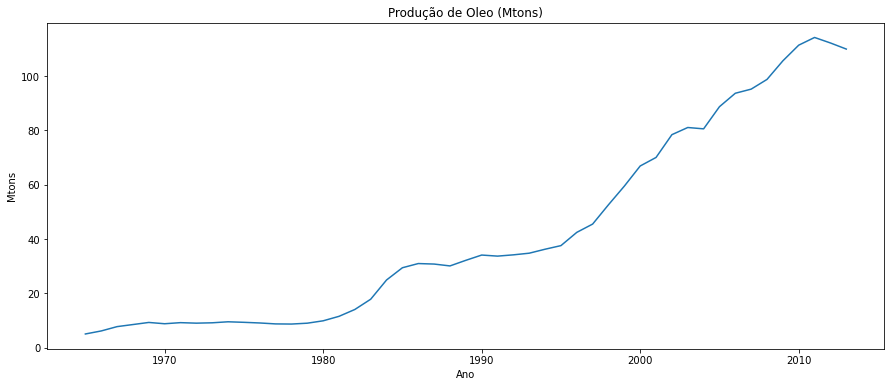

In [17]:
plt.title('Produção de Oleo (Mtons)')
plt.xlabel("Ano")
plt.ylabel("Mtons")
plt.plot(df['milhoes_tons'])

**Decomposição da tendencia, sazonalidade e resíduo da série**

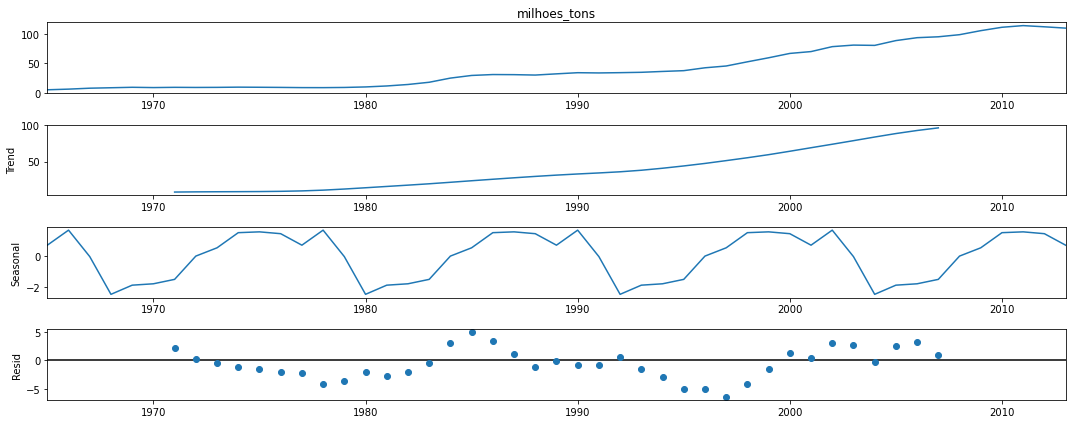

In [18]:
df_decomp = tsa.seasonal_decompose(df['milhoes_tons'], period=12)
df_decomp.plot();

Podemos observar:
1. Tendencia positiva (crescente)
2. A série não possue sazonalidade significativa, pois o gráfico está variando em torno de zero
3. O resíduo possue características de ruído branco (desvio padrão pequeno e variando em torno de zero)

**Média e desvio padrão da série**

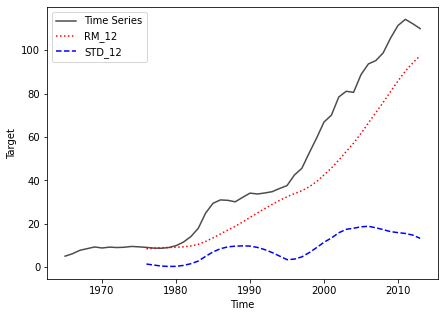

In [19]:
rolmean12 = df.rolling(window = 12).mean()
rolstd12 = df.rolling(window = 12).std()

plt.figure(figsize=(7, 5))
actual = plt.plot(df, color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

**Função de Autocorrelação (FAC) e Função de Autocorrelação Parcial (FACP)**

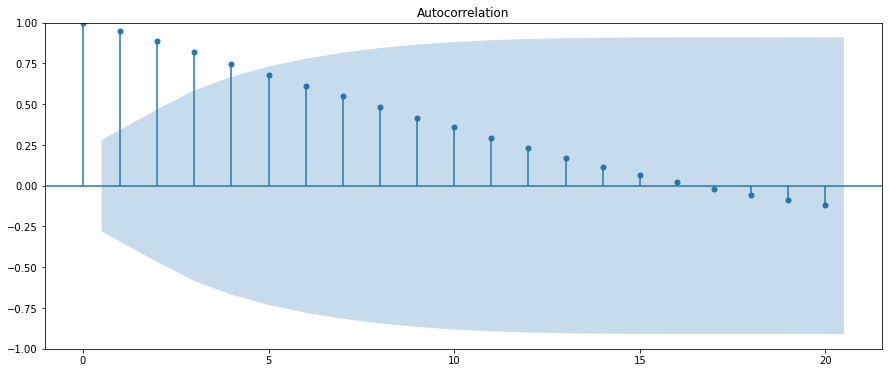

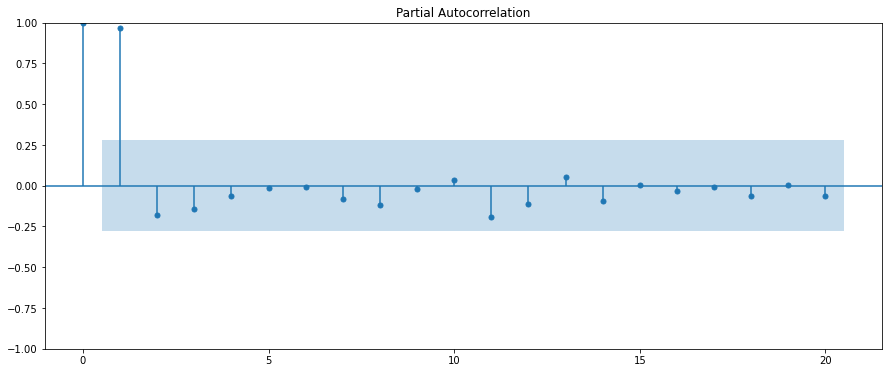

In [20]:
plot_acf(df, lags=20)
plot_pacf(df, lags=20)
plt.show()

Podemos observar:
1. A função de autocorrelação (FAC) tem decaimento exponencial
2. A função de autocorrelação parcial (FACP) tem corte brusco após leg = 2

Ou seja, a série tem caracteristicas para utilizarmos um Modelo Auto regressivo (AR)

**Teste de estacionariedade**

In [21]:
def teste_df(serie):
    #H0: série não estacionária 
    dftest = adfuller(serie, autolag='AIC')
    df_output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags','Nº Observações'])
    for key,value in dftest[4].items():
        df_output['Valor Crítico (%s)'%key] = value
    print(df_output)
    if df_output[0] < df_output['Valor Crítico (5%)']: # descarta a H0 se o teste estatistico for menor que o valor crítico 
        print('estacionária')
    else:
        print(df_output[0])
        print('não estacionária')

In [22]:
teste_df(df.values)

Test Statistic          0.424912
p-value                 0.982403
#Lags                   1.000000
Nº Observações         47.000000
Valor Crítico (1%)     -3.577848
Valor Crítico (5%)     -2.925338
Valor Crítico (10%)    -2.600774
dtype: float64
0.42491206216122157
não estacionária


In [23]:
df_diff = df.diff().dropna()

In [24]:
teste_df(df_diff.values)

Test Statistic         -3.405838
p-value                 0.010761
#Lags                   0.000000
Nº Observações         47.000000
Valor Crítico (1%)     -3.577848
Valor Crítico (5%)     -2.925338
Valor Crítico (10%)    -2.600774
dtype: float64
estacionária


A série não é estacionária, porém quando aplicamos uma diferenciação, ela fica estacionária. Então utilizaremos a serie diferenciada para a aplicação dos modelos.

## Pré - processamento

Divisão da base de dados em uma base para treinamento e outra para teste

In [25]:
print('Quantidade de linhas a serem consideradas para cada parte')
print('Total:',df.shape[0])
print('Train:',(df.shape[0])*0.75)
print('Test:',(df.shape[0])*0.25)

Quantidade de linhas a serem consideradas para cada parte
Total: 49
Train: 36.75
Test: 12.25


In [26]:
corte = round(len(df) * 0.75)

train = df[:corte]
test = df[corte:]

In [27]:
if len(df) == len(train) + len(test):
    print("Separação OK")
    print('Train (qtd linhas):',train.shape[0])
    print('Test (qtd linhas):',test.shape[0])
else:
    print("Rever separação")

Separação OK
Train (qtd linhas): 37
Test (qtd linhas): 12


In [28]:
#print('Quantidade de linhas a serem consideradas para cada parte')
#print('Total:',df.shape[0])
#print('Train:',(df.shape[0])*0.5)
#print('Validation:',(df.shape[0])*0.25)
#print('Test:',(df.shape[0])*0.25)

In [29]:
#limite1 = round(len(df) * 0.5)
#limite2 = round(len(df) * 0.75)

#train = df[:limite2]
#validation = df[limite1:limite2]
#test = df[limite2:]

In [30]:
#if len(df) == len(train) + len(validation) + len(test):
#if len(df) == len(train) + len(test):
 #   print("True")
  #  print('Train:',train.shape[0])
   #print('Validation:',validation.shape[0])
   # print('Test:',test.shape[0])
#else:
 #   print("Rever separação")

In [31]:
train.head()

,milhoes_tons
ano,
1965,5.033297
1966,6.147396
1967,7.738966
1968,8.504936
1969,9.277483


In [32]:
test

,milhoes_tons
ano,
2002,78.422303
2003,81.058067
2004,80.563939
2005,88.719863
2006,93.670600
2007,95.187961
2008,98.769011
2009,105.606944
2010,111.377764


## Metodologia Box-Jenkins

In [33]:
# Função para plotar o ACF E PACF
def acf_pacf(x, qtd_lag):
    fig = plt.figure(figsize=(16,10))
    ax1 = fig.add_subplot(221)
    fig = sm.graphics.tsa.plot_acf(x, lags=qtd_lag, ax=ax1)
    ax2 = fig.add_subplot(222)
    fig = sm.graphics.tsa.plot_pacf(x, lags=qtd_lag, ax=ax2)
    plt.show()

### (1) Identificação:

#### Função de Autocorrelação e Função de Autocorrelação Parcial

Utilizando a série de treinamento sem diferenciação:

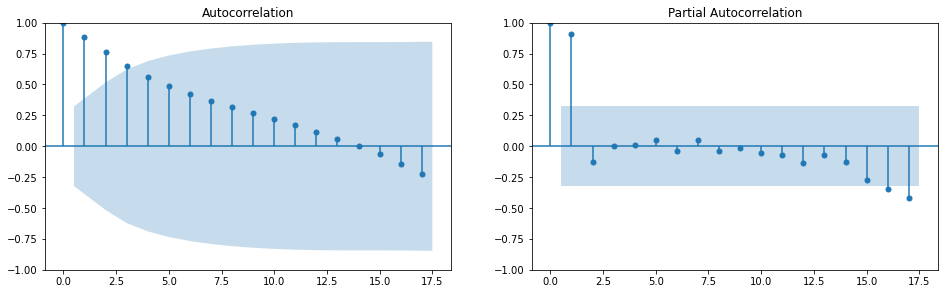

In [34]:
acf_pacf(train.milhoes_tons, 17)

Utilizando a série de treinamento com uma diferenciação:

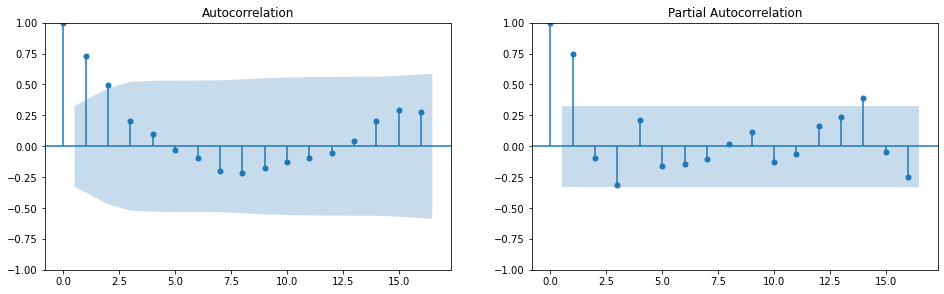

In [35]:
acf_pacf(train.milhoes_tons.diff().dropna(), 16)

Utilizando a série de treinamento com 2 diferenciações:

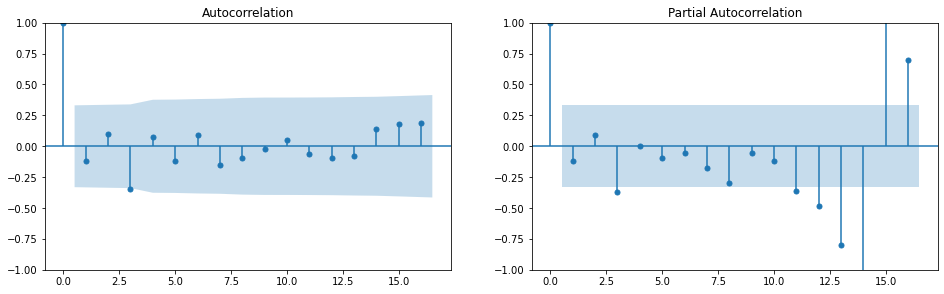

In [36]:
acf_pacf(train.milhoes_tons.diff().diff().dropna(), 16)

Como observamos anteriormente, a série sem diferenciação possue caracteristicas de um processo AR. Quando a série sofre 1 diferenciação, as caracteristicas da FAC e FACP continuam muito parecidas e quando a série sofre 2 diferenciações, observamos na FAC e FACP caracteristicas de um ruido branco. A principio, para termos o modelo mais simples (principio da passimonia) deveriamos utilizar a serie sem diferenciação, entretanto, vimos no teste de estacionariedade que esta série não é estacionária. Com isso, utilizaremos a série com 1 diferenciação.

#### Escolha do parâmetro (d):

Avaliando a quantidade de diferenciações

In [37]:
arima_d = 1

#### Escolha do parâmetro (p):

Avaliando FACP (Partial Autocorrelation)

In [38]:
arima_p = 1

#### Escolha do parâmetro (q):

Avaliando FAC (Autocorrelation)

In [39]:
arima_q = 0

### (2.1) Estimação:

In [40]:
model_arima = ARIMA(train.milhoes_tons, order=(arima_p, arima_d, arima_q))
model_fit = model_arima.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:           milhoes_tons   No. Observations:                   37
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -69.285
Date:                Tue, 27 Sep 2022   AIC                            142.571
Time:                        14:12:01   BIC                            145.738
Sample:                             0   HQIC                           143.676
                                 - 37                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8248      0.075     10.982      0.000       0.678       0.972
sigma2         2.6635      0.519      5.130      0.000       1.646       3.681
Ljung-Box (L1) (Q):                   0.10   Jarque-

### (2.2) Avaliação/Diagnóstico:

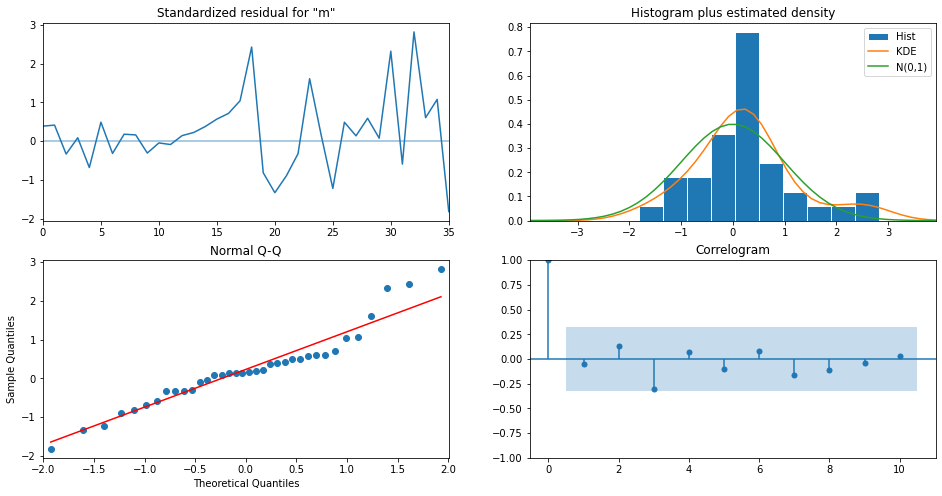

In [41]:
model_fit.plot_diagnostics(figsize=(16,8));

### (3) Previsão:

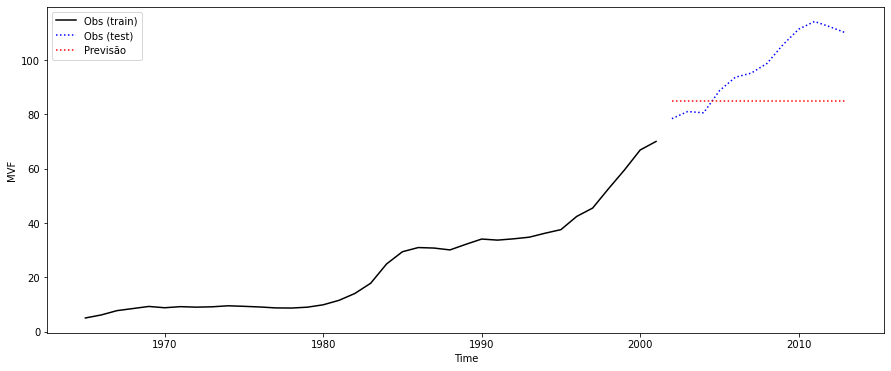

2002    84.826711
2003    84.826711
2004    84.826711
2005    84.826711
2006    84.826711
2007    84.826711
2008    84.826711
2009    84.826711
2010    84.826711
2011    84.826711
2012    84.826711
2013    84.826711
Name: predicted_mean, dtype: float64

In [42]:
previsao = model_fit.predict(start=1965 + 37, end=1965 + 48)

obs_train = plt.plot(train, color='black', label='Obs (train)')
obs_test = plt.plot(test, color='blue', label= 'Obs (test)', linestyle='dotted')#, 'bo') 
pred = plt.plot(previsao, color='red', label='Previsão', linestyle='dotted')#, 'bo') 

plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("MVF")
plt.show()
previsao

,pred,obs_test
2002,84.826711,78.422303
2003,84.826711,81.058067
2004,84.826711,80.563939
2005,84.826711,88.719863
2006,84.826711,93.670600
2007,84.826711,95.187961
2008,84.826711,98.769011
2009,84.826711,105.606944
2010,84.826711,111.377764
2011,84.826711,114.212252


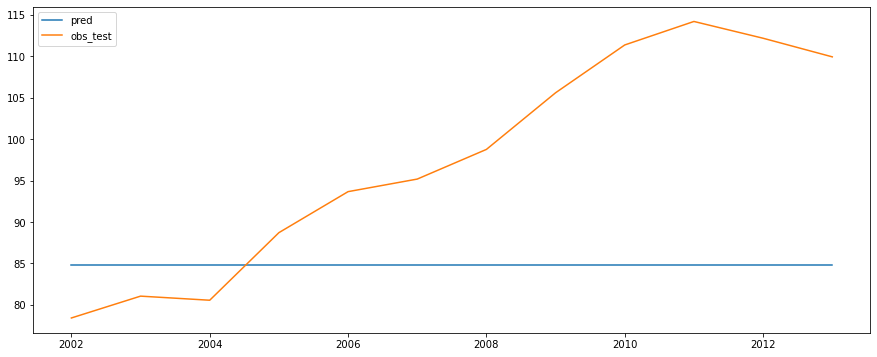

In [43]:
pred = model_fit.predict(start=1965 + 37, end=1965 + 48)
obs_test = test.milhoes_tons

pred_df = pd.DataFrame()
pred_df['pred'] = pred
pred_df['obs_test'] = obs_test

pred_df.plot()
pred_df

### Erros Previsão vs Teste

#### MSE

In [44]:
pred_df['MSE'] = mean_squared_error(pred_df['pred'], pred_df['obs_test'])
print(mean_squared_error(pred_df['pred'], pred_df['obs_test']))

320.6733462088776


#### MAPE

In [45]:
pred_df['MAPE'] = mean_absolute_error(pred_df['pred'], pred_df['obs_test'])
print(mean_absolute_error(pred_df['pred'], pred_df['obs_test']))

15.055613656521393


## Utilizando o Auto Arima

### (1) Identificação:

#### Escolha dos parametros d,p,q

In [46]:
model_auto_arima = auto_arima(df, max_p = 5 , max_q = 5, max_d = 2, 
                         max_P = 2, max_Q = 2, max_D = 2, m = 12, 
                         seasonal = False, trace = True, information_criterion = 'bic', 
                         stepwise = True)

Performing stepwise search to minimize bic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : BIC=inf, Time=0.24 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : BIC=230.948, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : BIC=232.108, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : BIC=229.584, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : BIC=227.133, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : BIC=inf, Time=0.11 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.436 seconds


### (2.1) Estimação:

In [47]:
arima_model = ARIMA(train, order = model_auto_arima.order).fit()
arima_result = arima_model.apply(test)
arima_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           milhoes_tons   No. Observations:                   12
Model:                 ARIMA(0, 2, 0)   Log Likelihood                 -40.978
Date:                Tue, 27 Sep 2022   AIC                             83.956
Time:                        14:12:21   BIC                             84.259
Sample:                             0   HQIC                            83.624
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.9345      0.602      4.873      0.000       1.754       4.115
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 2.15
Prob(Q):                              0.47   Prob(JB):                         0.34
Heteroskedasticity (H):               0.34   Skew:                             1.12
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Parameters and standard errors were estimated using a different dataset and were then applied to this dataset. Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### (2.2) Avaliação/Diagnóstico:

ValueError: could not broadcast input array from shape (10,) into shape (11,)

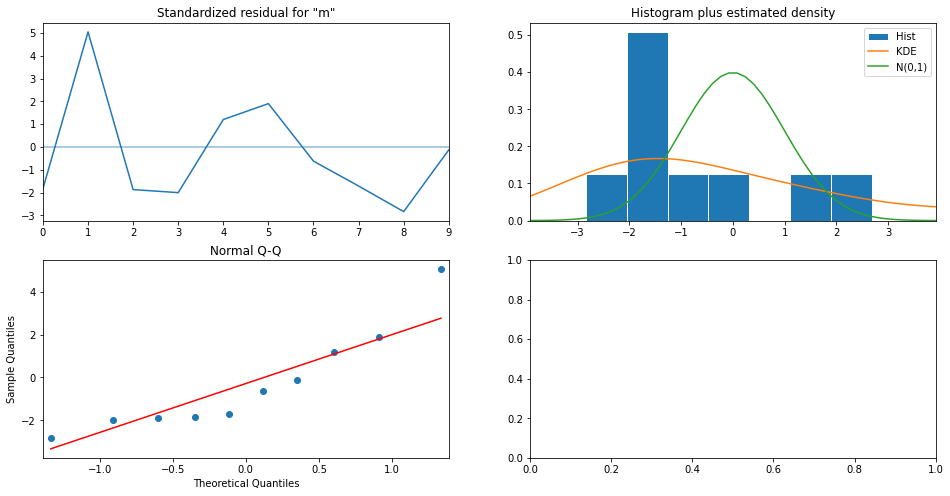

In [48]:
arima_result.plot_diagnostics(figsize=(16,8));

### (3) Previsão:

In [49]:
predict_arima = arima_result.predict().values
predict_arima

array([  0.        , 117.63351257,  83.69383078,  80.06981141,
        96.87578622,  98.62133789,  96.70532195, 102.35006003,
       112.44487651, 117.14858388, 117.04674069, 110.1613035 ])

In [50]:
test['Previsão Arima'] = predict_arima
test.head()

,milhoes_tons,Previsão Arima
ano,,
2002,78.422303,0.000000
2003,81.058067,117.633513
2004,80.563939,83.693831
2005,88.719863,80.069811
2006,93.670600,96.875786


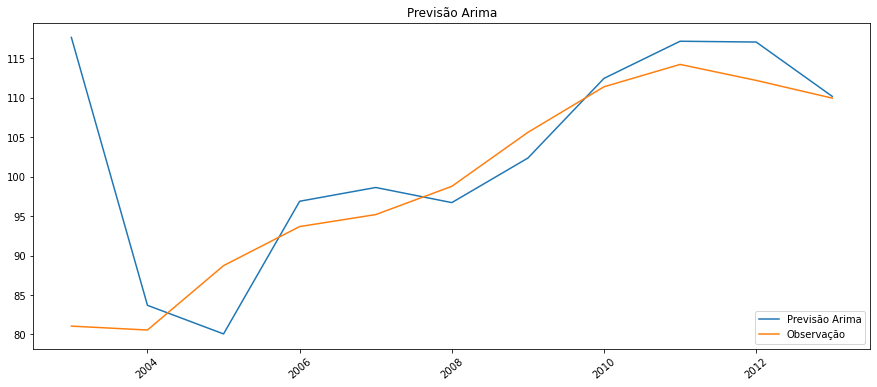

In [51]:
fig, ax = plt.subplots()
ax.plot(test['Previsão Arima'].iloc[1:], label='Previsão Arima')
ax.plot(test['milhoes_tons'].iloc[1:], label='Observação')
#ax.plot(dados['Venda'], label='Observação')
plt.title("Previsão Arima")
plt.xticks(rotation=40)
plt.legend()
plt.legend()

### Erros Arima

#### MSE

In [52]:
test['Arima MSE'] = mean_squared_error(predict_arima, test['milhoes_tons'])
print(mean_squared_error(predict_arima, test['milhoes_tons']))

636.8997105800777


#### MAPE

In [53]:
test['Arima MAPE'] = mean_absolute_error(predict_arima, test['milhoes_tons'])
print(mean_absolute_error(predict_arima, test['milhoes_tons']))

12.318397289097868


## LIXO

In [58]:
#adf = adfuller(df)
#print(f'p-valor: {round(adf[1],2)}')

In [81]:
#df.info()

In [80]:
#Definindo as variáveis preditoras (X) e a target (y). Ainda não está pegando o bairro.
#X = df.iloc[:,1]
#y = df.iloc[:,2]

In [82]:
#X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)
#X_train.shape
#y_train.shape

In [20]:
#df['Ano'].value_counts()

In [14]:
#df['Year'] = df['Year'].astype(str)

In [14]:
#df['Year'] = df['Year'].str[0:4]
#df

In [16]:
#df['Year'] = df['Year'].astype(int)

In [15]:
#df.info()

In [177]:
#df.set_index('Year',inplace=True)
#df.index=df.index.astype(int)

### Eliminação da Tendência por Diferenciação

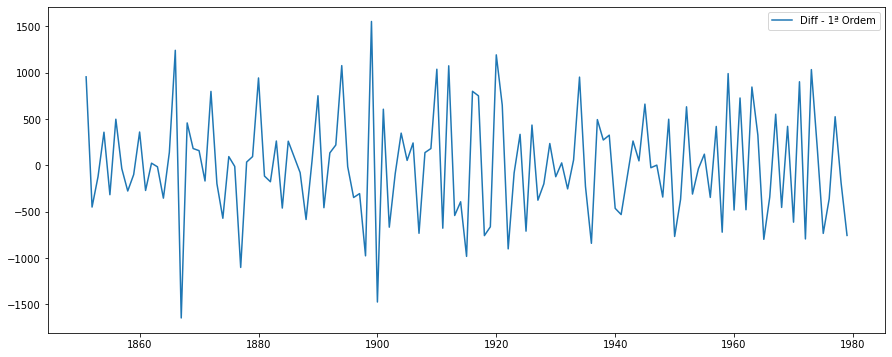

In [60]:
df_1ordem = df.diff()
plt.plot(df_1ordem, label="Diff - 1ª Ordem")
plt.legend(loc='best')
plt.show()

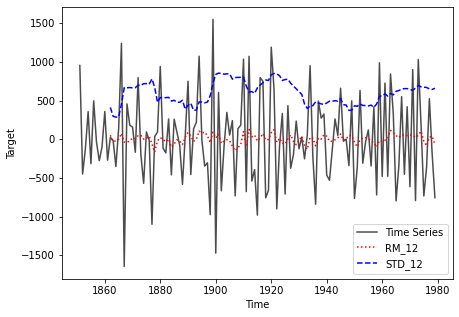

In [61]:
# A 13a observação será a média das 11 anteriores
rolmean12 = df.diff().rolling(window = 12).mean()
rolstd12 = df.diff().rolling(window = 12).std()

plt.figure(figsize=(7, 5))
actual = plt.plot(df['Milimitros'].diff(), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

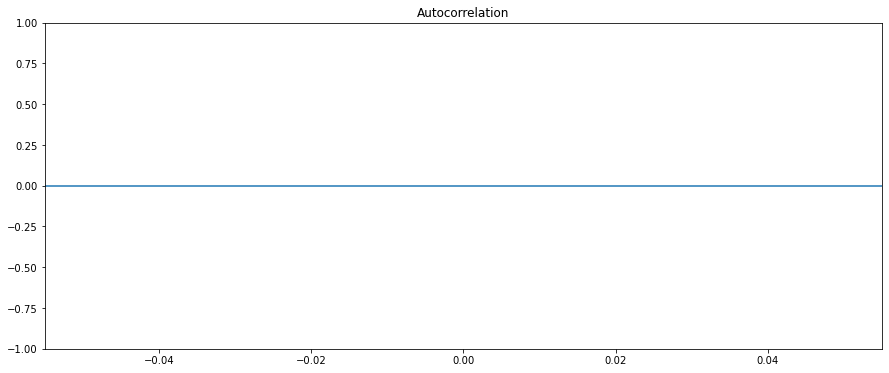

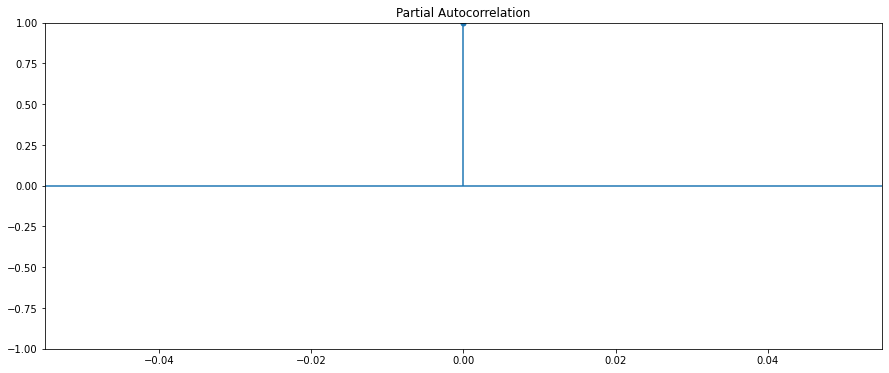

In [63]:
plot_acf(df_1ordem, lags=50)
plot_pacf(df_1ordem, lags=50)
plt.show()

In [64]:
df_decomp_1ordem = tsa.seasonal_decompose(df_1ordem, period=12)
df_decomp_1ordem.plot();

ValueError: This function does not handle missing values

In [60]:
#df_logged = df["ncasos"].apply(lambda x : np.log(x))

#ax1 = plt.subplot()
#df_logged.plot(figsize=(12,4) ,color="tab:red", title="Log Transformed Values", ax=ax1);

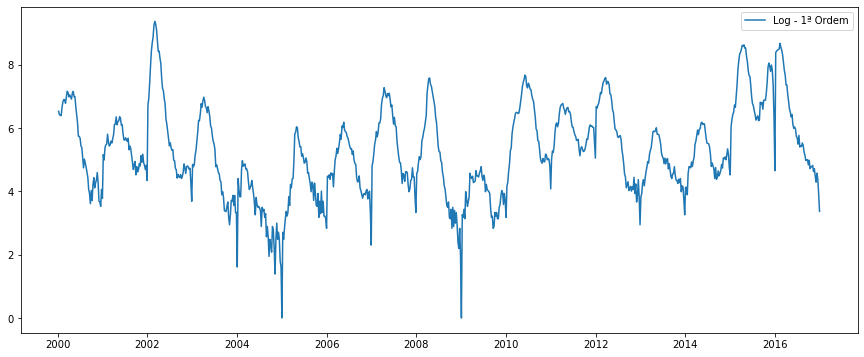

In [59]:
df_logg = np.log(df)
plt.plot(df_logg, label = "Log - 1ª Ordem")
plt.legend(loc = 'best')
plt.show()

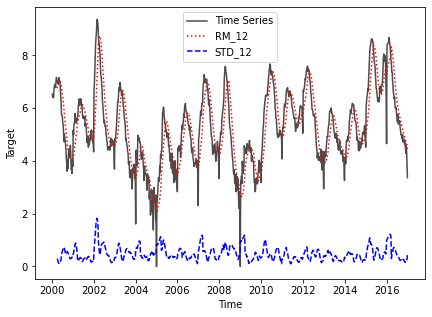

In [61]:
rolmean12 = np.log(df).rolling(window = 12).mean()
rolstd12 = np.log(df).rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(np.log(df['ncasos']), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

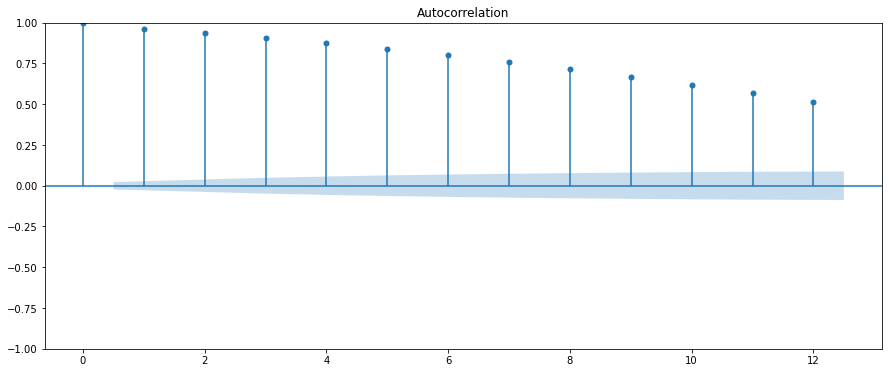

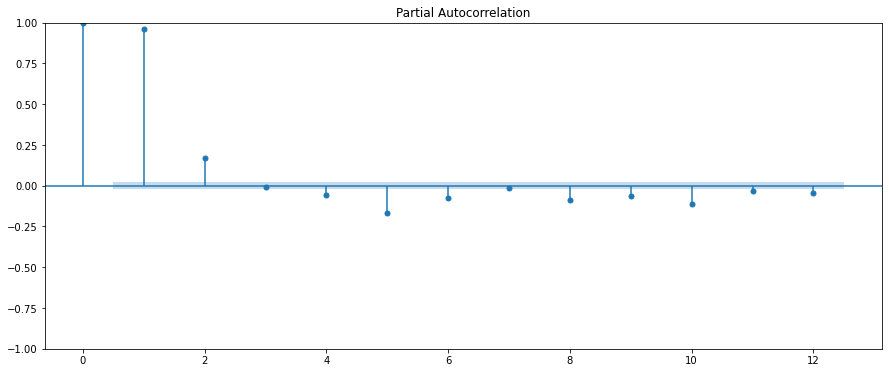

In [62]:
plot_acf(df_logg.dropna(), lags=12, alpha=0.5);
plot_pacf(df_logg.dropna(), lags=12, alpha=0.5);

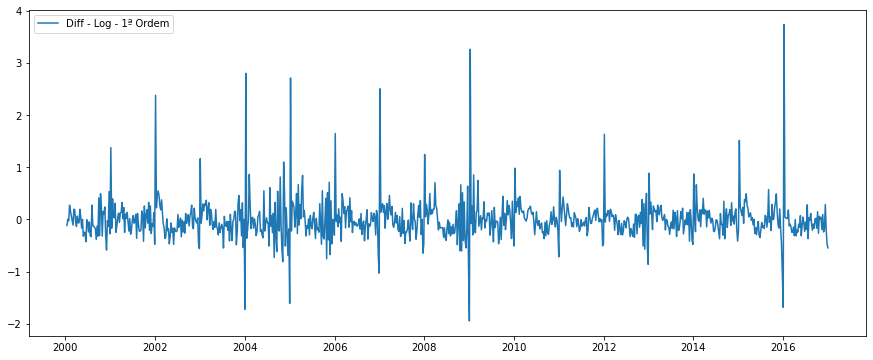

In [66]:
df_diff_logg = df_logg.diff()
plt.plot(df_diff_logg, label="Diff - Log - 1ª Ordem")
plt.legend(loc='best')
plt.show()

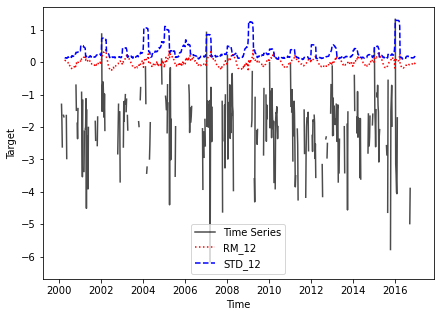

In [68]:
rolmean12 = df_diff_logg.rolling(window = 12).mean()
rolstd12 = df_diff_logg.rolling(window = 12).std()
plt.figure(figsize=(7, 5))
actual = plt.plot(np.log(df_diff_logg['ncasos']), color='black', label='Time Series', alpha=0.7)
rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
plt.legend(loc='best')
plt.xlabel("Time")
plt.ylabel("Target")
plt.show()

In [67]:
#df_logg2 = np.log(df_logg)
#plt.plot(df_logg, label = "Log - 2ª Ordem")
#plt.legend(loc = 'best')
#plt.show()

In [69]:
#rolmean12 = np.log(df_logg).rolling(window = 12).mean()
#rolstd12 = np.log(df_logg).rolling(window = 12).std()
#plt.figure(figsize=(7, 5))
#actual = plt.plot(np.log(df_logg['ncasos']), color='black', label='Time Series', alpha=0.7)
#rm_12 = plt.plot(rolmean12, color='red', label='RM_12', linestyle='dotted')#, 'bo') 
#std_12 = plt.plot(rolstd12, color='blue', label='STD_12', linestyle='dashed')#, fmt='2')
#plt.legend(loc='best')
#plt.xlabel("Time")
#plt.ylabel("Target")
#plt.show()

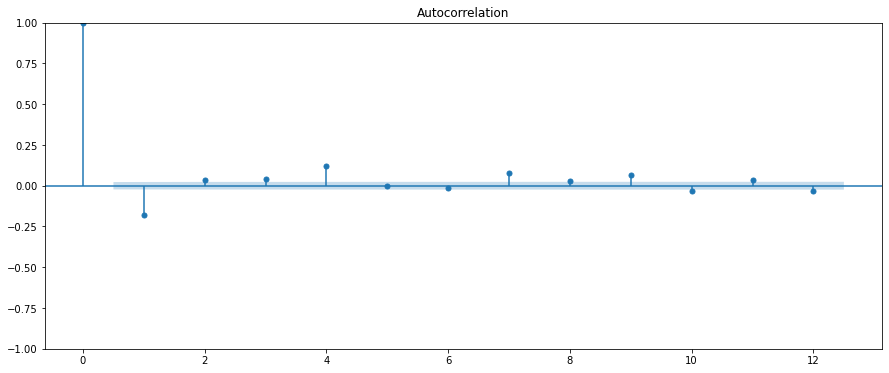

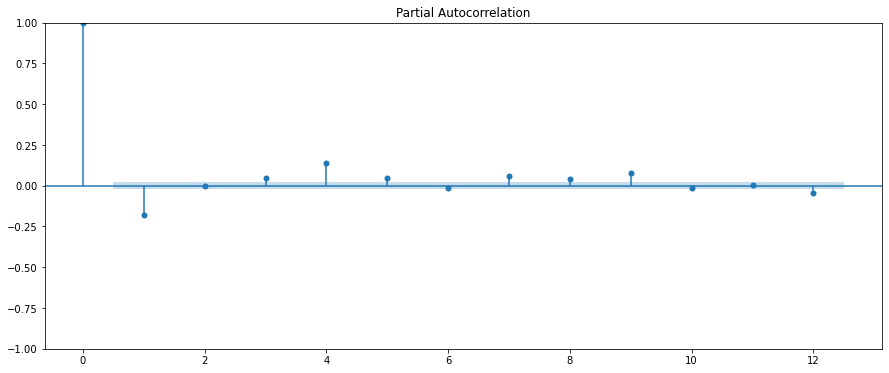

In [70]:
plot_acf(df_diff_logg.dropna(), lags=12, alpha=0.5);
plot_pacf(df_diff_logg.dropna(), lags=12, alpha=0.5);